In [325]:
from scipy import special
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import fmin_l_bfgs_b as fmin  # minimizar
import time  # medir tiempo
from numba import jit  
from scipy.fftpack import fft
from statsmodels.stats.correlation_tools import cov_nearest
import seaborn as sb
import scipy.signal as sgnl
from scipy import signal
import pandas as pd
import pylab as plot
from sklearn.metrics import mean_squared_error

min_noise=0.005

In [326]:
plot_params = {'legend.fontsize': 18,
          'figure.figsize': (15, 5),
         'xtick.labelsize':'18',
         'ytick.labelsize':'18',
         'axes.titlesize':'24',
         'axes.labelsize':'22'}
plt.rcParams.update(plot_params)

In [327]:
import gplp

In [328]:
#Parameters of the synthetic signal

L=100 #Domain is [-L,L]
n=5000 #Total number of points to be sampled
noise_var =1 #Gaussian noise variable (Variance of a Normal distribution)
sample =.25  #Total fraction of points to be sampled
low_freqs = np.asarray([0.31,0.38,0.48]) #Array of low-frequencies to be summed in the signal
high_freqs =np.asarray([0.51,0.64,0.75])  #Array of high-frequencies to be summed in the signal

coefs_low =np.asarray([1,1,1,1]) #Amplitude of each low-freq signal
coefs_high =np.asarray([1,1,1,1]) #Amplitude of each high-freq signal

m= int(n*sample)  #Number of sampled points
window = (low_freqs.max() + high_freqs.min())/2  #Width of the filter



In [340]:
#y corresponds to the observed signal (Including noise)
#x_obs correspond to the times where each point of the signal is observed
#f is the complete signal (Better resolution than y and without noise)
#f_alta is the hih frequency component of the signal
#f_baja is the low-frequency component
#x is the entire domain of the complete signal (x_obs is some subset of x)

    
(y,x_obs,P, f, f_alta, f_baja, x,nyq) = synth_data(low_freqs,high_freqs, L=L, 
                                                       n=n ,sample= sample, noise_var= noise_var, random_sampling=False)

In [341]:
signal = GPLP(x_obs, y, window)

In [344]:
signal.train()

Condicion inicial optimizador:  [ 0.9498425   3.7485207  30.90455631]
Tiempo entrenamiento 47.8964 (s)
Hiperparametros encontrados:  [1.01185907 3.53108121 3.84693319] NLL:  2286.124886541338


In [343]:
#The trained parameters when the parameters of the synth signal are the ones by default. 

signal.noise = 0.9498425
signal.gamma = 3.7485207
signal.sigma = 30.90455631

In [345]:
#Here we apply the low-pass filter, the filtered data is located in signal.filtered

signal.gauss_low_filter()

(0.2, 1)

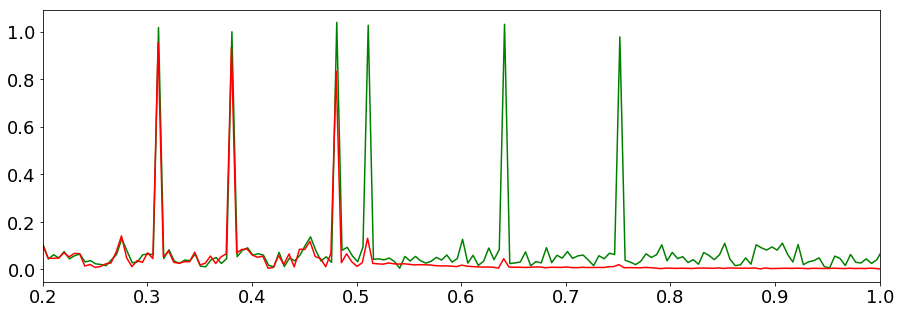

In [347]:
plt.plot(signal.spectra_domain, signal.spectra,'g', label = 'Ground truth spectrum')
plt.plot(signal.filt_spect_dom, signal.filt_spect,'r', label = 'GPLP')
plt.xlim((0.2, 1))

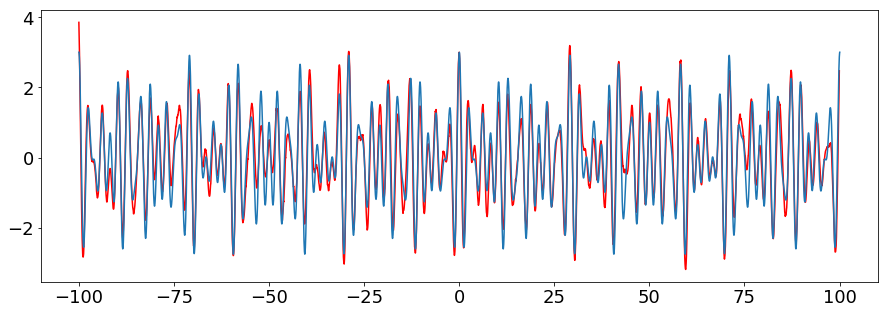

In [348]:
#plt.plot(signal.x, signal.y)
plt.plot(signal.time, signal.filtered,'r')
plt.plot(x-signal.offset, f_baja)